# Comment Length Distribution

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Cleaned Comments Dataset

In [2]:
df = pd.read_csv('../../data_preprocessed/comments_cleaned.csv')
df['length'] = df['comment'].astype(str).apply(lambda x: len(x.split()))
max_len = df['length'].max()

In [3]:
print(f"Max length: {max_len}")

Max length: 94


## Data Exploration

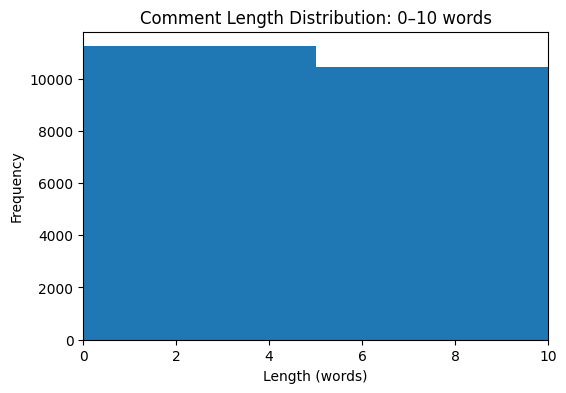

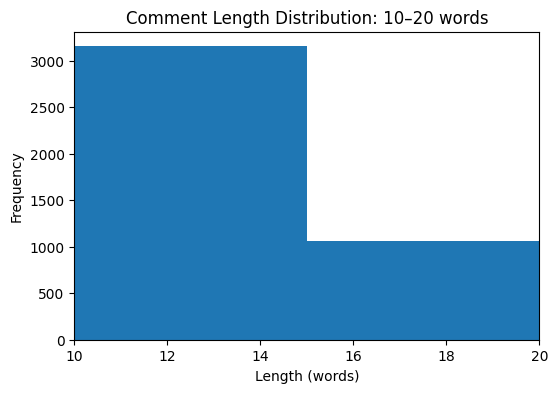

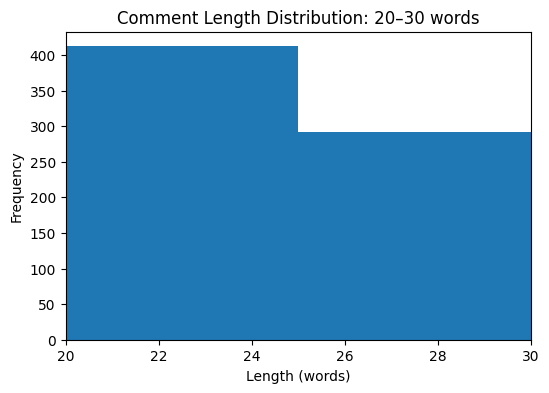

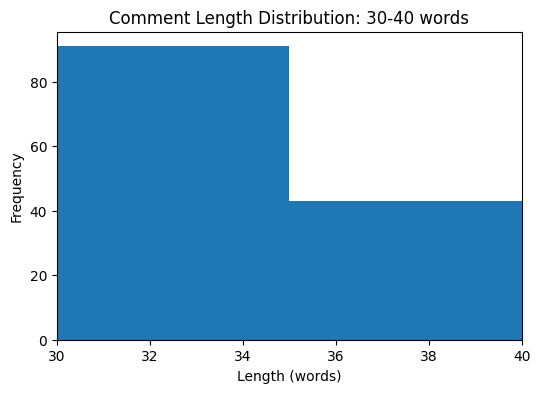

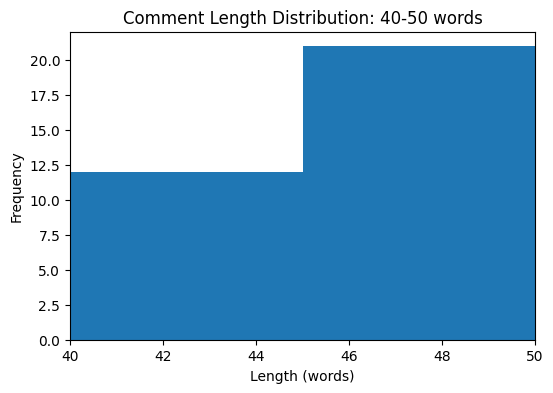

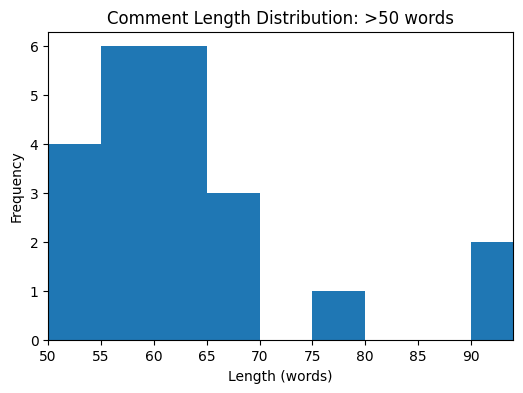

In [4]:
# Define segments and titles
segments = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, max_len)]
titles = ['0–10 words', '10–20 words', '20–30 words', '30-40 words', '40-50 words', '>50 words']

# Generate one figure per segment
for (low, high), title in zip(segments, titles):
    if high == max_len:
        data = df[df['length'] >= low]['length']
        upper = int(max_len)
    else:
        data = df[(df['length'] >= low) & (df['length'] < high)]['length']
        upper = high

    bins = range(low, upper + 5, 5)

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=bins)
    plt.xlim(low, upper)
    plt.xlabel('Length (words)')
    plt.ylabel('Frequency')
    plt.title(f'Comment Length Distribution: {title}')
    plt.show()